In [ ]:
!pip install wfdb
!pip install py-ecg-detectors
!pip install BaselineRemoval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43817 sha256=f781ea43c554b2442f1d73166d372dbf314f914b778c94cf1cceee55814228cc
  Stored in directory: /root/.cache/pip/wheels/13/39/c2/d113611d276bf55252ed5a640e98596d7dcc96535afbf254d5
Successfully built gatspy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
from scipy import signal
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import wfdb #library for reading ecg data https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb
from ecgdetectors import Detectors # desde https://pypi.org/project/py-ecg-detectors/
from hrv import HRV
from BaselineRemoval import BaselineRemoval
import seaborn as sns

Mounted at /content/drive


In [ ]:
with open('/content/drive/Shareddrives/Proyecto Final/Progra/CONTROLS') as f:
  lines = f.readlines()

data = {
    
}

baseline = "/content/drive/Shareddrives/Proyecto Final/Progra/databases/PTB/"
for line in lines:
  data_string = line.split("/")
  baseline_data = baseline + data_string[0] + "/" + data_string[1]
  try:
    time = 10 #se utilizara desde el segundo 10 para eviar el ruido inicial de los primeros readings
    sample_from = time * 1000
    sample_to = 20*1000 # 5s de sampleo
    data[data_string[0]] = {}
    data[data_string[0]]["raw_data"] = record = wfdb.rdrecord(baseline_data.split("\n")[0], sampfrom = sample_from, sampto = sample_to)
  except:
    data.pop(data_string[0])

new_data = data
print(new_data)

{'patient104': {'raw_data': <wfdb.io.record.Record object at 0x7faac4847fd0>}, 'patient105': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fd390>}, 'patient116': {'raw_data': <wfdb.io.record.Record object at 0x7faaf9ef13c0>}, 'patient117': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fdff0>}, 'patient121': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fd420>}, 'patient122': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fe350>}, 'patient131': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fc0a0>}, 'patient150': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fdf30>}, 'patient155': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fc0d0>}, 'patient156': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fdf90>}, 'patient165': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fe320>}, 'patient169': {'raw_data': <wfdb.io.record.Record object at 0x7faac42fc070>}, 'patient170': {'raw_data': <wfdb.io.record.Record object at 0x7

In [ ]:
for item in new_data:
  wfdb.plot_wfdb(record = new_data[item]["raw_data"] , ecg_grids = [0])
  display(new_data[item]["raw_data"].__dict__)

In [ ]:
new_data

{'patient104': {'raw_data': <wfdb.io.record.Record at 0x7faac4847fd0>},
 'patient105': {'raw_data': <wfdb.io.record.Record at 0x7faac42fd390>},
 'patient116': {'raw_data': <wfdb.io.record.Record at 0x7faaf9ef13c0>},
 'patient117': {'raw_data': <wfdb.io.record.Record at 0x7faac42fdff0>},
 'patient121': {'raw_data': <wfdb.io.record.Record at 0x7faac42fd420>},
 'patient122': {'raw_data': <wfdb.io.record.Record at 0x7faac42fe350>},
 'patient131': {'raw_data': <wfdb.io.record.Record at 0x7faac42fc0a0>},
 'patient150': {'raw_data': <wfdb.io.record.Record at 0x7faac42fdf30>},
 'patient155': {'raw_data': <wfdb.io.record.Record at 0x7faac42fc0d0>},
 'patient156': {'raw_data': <wfdb.io.record.Record at 0x7faac42fdf90>},
 'patient165': {'raw_data': <wfdb.io.record.Record at 0x7faac42fe320>},
 'patient169': {'raw_data': <wfdb.io.record.Record at 0x7faac42fc070>},
 'patient170': {'raw_data': <wfdb.io.record.Record at 0x7faac42fdf60>},
 'patient173': {'raw_data': <wfdb.io.record.Record at 0x7faac42f

In [ ]:
# Obtenemos la edad y el sexo de cada uno de los pacientes para agregarlos a los features.

for item in new_data:
  dict_data = new_data[item]["raw_data"].__dict__
  new_data[item]["sex"] = dict_data['comments'][1].replace('sex: ', '')
  new_data[item]["age"] = dict_data['comments'][0].replace('age: ', '')

new_data

{'patient104': {'raw_data': <wfdb.io.record.Record at 0x7faac4847fd0>,
  'sex': 'male',
  'age': '58'},
 'patient105': {'raw_data': <wfdb.io.record.Record at 0x7faac42fd390>,
  'sex': 'female',
  'age': '32'},
 'patient116': {'raw_data': <wfdb.io.record.Record at 0x7faaf9ef13c0>,
  'sex': 'male',
  'age': '54'},
 'patient117': {'raw_data': <wfdb.io.record.Record at 0x7faac42fdff0>,
  'sex': 'male',
  'age': '37'},
 'patient121': {'raw_data': <wfdb.io.record.Record at 0x7faac42fd420>,
  'sex': 'female',
  'age': '69'},
 'patient122': {'raw_data': <wfdb.io.record.Record at 0x7faac42fe350>,
  'sex': 'male',
  'age': '68'},
 'patient131': {'raw_data': <wfdb.io.record.Record at 0x7faac42fc0a0>,
  'sex': 'male',
  'age': '26'},
 'patient150': {'raw_data': <wfdb.io.record.Record at 0x7faac42fdf30>,
  'sex': 'male',
  'age': '36'},
 'patient155': {'raw_data': <wfdb.io.record.Record at 0x7faac42fc0d0>,
  'sex': 'male',
  'age': '37'},
 'patient156': {'raw_data': <wfdb.io.record.Record at 0x7faa

In [ ]:
# ecg_df = new_data["p170"]["raw_data"].to_dataframe() # nos arroja el record como un dataframe que podemos editar, visualizar,y demas
# ecg_df

In [ ]:

#Aqui entra lo intenso, hacer un for loop de cada uno de los pacientes, hacerle filtrado a los datos y obtener los features importantes.

#Orden:
#1. Convertir ECG a dataframe
#2. Filtrar el baseline
#3. Cambiar el indice (pue k no sea necesario)
#4. Obtener las features
#5. Guardar las features en el diccionario

def baseline_filter(data):
  data_df = data.to_dataframe()
  sos = signal.butter(5, 15, 'hp', fs=1000, output='sos')
  filtered_df = pd.DataFrame(signal.sosfilt(sos, data_df), columns = data_df.columns.to_list())
  base_Obj = BaselineRemoval(data_df['ii'])
  b_rem_df=base_Obj.ZhangFit()
  return b_rem_df

def r_peak_detection(data):
  fs = 1000 # Si la frecuencia de sampleo cambia, aqui lo modificamos
  detectors = Detectors(fs)
  r_peaks = (detectors.wqrs_detector(data))
  return r_peaks

def r_peak_cleanup(data,r_peaks_data):
  r_peaks_filter = r_peaks_data
  for i in range(len(r_peaks_filter)):
    try:
      if data[r_peaks_filter[i]] < 0.2:
        r_peaks_filter.pop(i)
    except:
      break
  return r_peaks_filter

def features(r_peaks_data, data_item):

  fs = 1000
  hrv_class = HRV(fs)

  #tengo duda de qp con el heartrate

  heart_rate = HRV.HR(hrv_class, r_peaks_data)
  data_item["heart_rate_data"] = heart_rate
  data_item["heart_rate_std"] = heart_rate.std()
  # data_tiem["heart_rate_var"] = HRV.
  # data_item["no_rPeaks"] = r_peaks.value_counts()
  heart_rate = heart_rate.mean()
  data_item["heart_rate"] = heart_rate
  

  data_item["nn20"] = HRV.NN20(hrv_class,r_peaks_data) #the number of pairs of successive NNs that differ by more than 20 ms.
  data_item["nn50"] = HRV.NN50(hrv_class,r_peaks_data) # the number of pairs of successive NNs that differ by more than 50 ms.
  data_item["pnn20"] = HRV.pNN20(hrv_class,r_peaks_data) # the proportion of NN20 divided by total number of NNs.
  data_item["pnn50"] = HRV.pNN50(hrv_class,r_peaks_data) # the proportion of NN50 divided by total number of NNs.
  data_item["rmssd"] = HRV.RMSSD(hrv_class,r_peaks_data) # (root mean square of successive differences).
  data_item["sdnn"]= HRV.SDNN(hrv_class,r_peaks_data) # the standard deviation of NN intervals.
  data_item["sdsd"] = HRV.SDSD(hrv_class,r_peaks_data) # Calculate SDSD (standard deviation of successive differences), the standard deviation of the successive differences between adjacent NNs.

  if heart_rate > 100 :
    data_item["tachycardia"] = 1
    data_item["bradycardia"] = 0
  elif heart_rate < 60:
    data_item["tachycardia"] = 0
    data_item["bradycardia"] = 1
  else:
    data_item["tachycardia"] = 0
    data_item["bradycardia"] = 0

  data_item["arrythmia"] = 0 #Esto es solo para el caso de healthy patients

final_data = new_data

for item in final_data:
  filtered_data = baseline_filter(final_data[item]["raw_data"])
  final_data[item]["filtered_data"] = filtered_data
  r_peaks_data = r_peak_detection(filtered_data)
  r_peaks_clean = r_peak_cleanup(filtered_data, r_peaks_data)
  final_data[item]["r_peaks"] = r_peaks_clean
  features (r_peaks_clean,final_data[item])

final_data



IndexError: ignored

In [ ]:
final_data_df = pd.DataFrame.from_dict(final_data, orient = 'index')

final_data_df = final_data_df.join(pd.get_dummies(final_data_df["sex"])).drop("sex", axis = 1)



In [ ]:
# from matplotlib.cbook import print_cycles
# for item in final_data:
#   data = pd.DataFrame(final_data[item]["filtered_data"])
#   x = list(range(0, len(data)))
#   data_r_peaks = final_data[item]["r_peaks"]
#   data.reset_index(inplace=True,drop=True)
#   # print(data[data_r_peaks])
#   # print(data.index.isin(data_r_peaks))
#   print(data_r_peaks)
#   # print(data_r_peaks)
#   plt.figure()
#   ax = plt.axes()
#   plt.plot(x, data)
#   plt.plot(data_r_peaks, data[data_r_peaks], 'ro')
#   ax.set_xlim([0,10000])
#   # plt.title(method)

<Axes: >

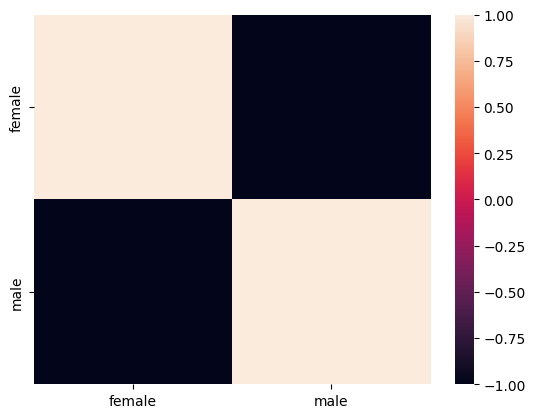

In [ ]:
corr = final_data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

Se ve rara la matriz de correlacion porque no hay datos de pacientes con arritmia ni bardicardia.

In [ ]:
# from pathlib import Path  
# filepath = Path('/content/drive/Shareddrives/Proyecto Final/Progra/feature_extraction_test2.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  

# final_data_df.to_csv(filepath)
# # final_data_df.to_excel(filepath)

Falta agregar un loop para cargar automaticamente todos los datos de los healthy controls.

In [ ]:
final_data_df

,raw_data,age,filtered_data,female,male
patient104,<wfdb.io.record.Record object at 0x7faac4847fd0>,58,"[-0.004244584956180741, -0.000787030791756349,...",0,1
patient105,<wfdb.io.record.Record object at 0x7faac42fd390>,32,NaN,1,0
patient116,<wfdb.io.record.Record object at 0x7faaf9ef13c0>,54,NaN,0,1
patient117,<wfdb.io.record.Record object at 0x7faac42fdff0>,37,NaN,0,1
patient121,<wfdb.io.record.Record object at 0x7faac42fd420>,69,NaN,1,0
patient122,<wfdb.io.record.Record object at 0x7faac42fe350>,68,NaN,0,1
patient131,<wfdb.io.record.Record object at 0x7faac42fc0a0>,26,NaN,0,1
patient150,<wfdb.io.record.Record object at 0x7faac42fdf30>,36,NaN,0,1
patient155,<wfdb.io.record.Record object at 0x7faac42fc0d0>,37,NaN,0,1
patient156,<wfdb.io.record.Record object at 0x7faac42fdf90>,17,NaN,0,1


# Capitulo 2: Arritmias
Sigue hacer lo anterior pero ahora con la base de datos de arritmias.

In [ ]:
with open('/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/arrythmias.txt') as t:
  arrythmias = t.readlines()

data = {
    
}

baseline = "/content/drive/Shareddrives/Proyecto Final/Progra/databases/MIT Arrythmia/"

i = 0
for line in arrythmias:
  data_string = line.split(",")
  baseline_data = baseline + data_string[0]

  if data_string[0] in data:
    sample = data_string[0] + str(i)
    i+=1
  else:
    sample = data_string[0]
  if data_string[0] == '\n':
    break
  try:
    minutes = int(data_string[2])
    time = (minutes*60) + int(data_string[3].split("/n")[0])
    sample_from = (time-5) * 360
    sample_to = (time+5)*360  # 10 s de sampling
    data[sample] = {}
  except:
    data.pop(sample)
  data[sample]["raw_data"] = record = wfdb.rdrecord(baseline_data, sampfrom = sample_from, sampto = sample_to)


new_data = data
print(new_data)

TypeError: ignored

In [ ]:
for item in new_data:
  wfdb.plot_wfdb(record = new_data[item]["raw_data"], ecg_grids = [0])
  display(new_data[item]["raw_data"].__dict__)

En la base de datos de arritmia cambia un poco como se refieren a la edad y sexo, asi que tendremos que hacer algunos cambios.

In [ ]:

for item in new_data:
  dict_data = new_data[item]["raw_data"].__dict__
  new_data[item]["sex"] = dict_data['comments'][0].split(' ')[1]
  new_data[item]["age"] = dict_data['comments'][0].split(' ')[0]

new_data

In [ ]:
def baseline_filter(data):
  data_df = data.to_dataframe()
  # print(data_df)
  sos = signal.butter(5, 15, 'hp', fs=360, output='sos')
  filtered_df = pd.DataFrame(signal.sosfilt(sos, data_df), columns = data_df.columns.to_list())
  base_Obj = BaselineRemoval(data_df["MLII"])
  b_rem_df=base_Obj.ZhangFit()
  return b_rem_df

def r_peak_detection(data):
  fs = 360 # Si la frecuencia de sampleo cambia, aqui lo modificamos
  detectors = Detectors(fs)
  r_peaks = (detectors.wqrs_detector(data))
  return r_peaks

def r_peak_cleanup(data,r_peaks_data):
  r_peaks_filter = r_peaks_data
  for i in range(len(r_peaks_filter)):
    try:
      if data[r_peaks_filter[i]] < 0.2:
        r_peaks_filter.pop(i)
    except:
      break
  return r_peaks_filter

def features(r_peaks_data, data_item):

  fs = 360 #cambia el sampling rate para arritmia
  hrv_class = HRV(fs)

  #tengo duda de qp con el heartrate

  heart_rate = HRV.HR(hrv_class, r_peaks_data)
  data_item["heart_rate_data"] = heart_rate
  data_item["heart_rate_std"] = heart_rate.std()
  data_tiem["heart_rate_var"] = np.var(heat_rate)
  data_item["no_rPeaks"] = r_peaks.value_counts()
  heart_rate = heart_rate.mean()
  data_item["heart_rate"] = heart_rate
  

  data_item["nn20"] = HRV.NN20(hrv_class,r_peaks_data) #the number of pairs of successive NNs that differ by more than 20 ms.
  data_item["nn50"] = HRV.NN50(hrv_class,r_peaks_data) # the number of pairs of successive NNs that differ by more than 50 ms.
  data_item["pnn20"] = HRV.pNN20(hrv_class,r_peaks_data) # the proportion of NN20 divided by total number of NNs.
  data_item["pnn50"] = HRV.pNN50(hrv_class,r_peaks_data) # the proportion of NN50 divided by total number of NNs.
  data_item["rmssd"] = HRV.RMSSD(hrv_class,r_peaks_data) # (root mean square of successive differences).
  data_item["sdnn"]= HRV.SDNN(hrv_class,r_peaks_data) # the standard deviation of NN intervals.
  data_item["sdsd"] = HRV.SDSD(hrv_class,r_peaks_data) # Calculate SDSD (standard deviation of successive differences), the standard deviation of the successive differences between adjacent NNs.

  if heart_rate > 100 :
    data_item["tachycardia"] = 1
    data_item["bradycardia"] = 0
  elif heart_rate < 60:
    data_item["tachycardia"] = 0
    data_item["bradycardia"] = 1
  else:
    data_item["tachycardia"] = 0
    data_item["bradycardia"] = 0

  data_item["arrythmia"] = 1 #Esto es solo para el caso de healthy patients

final_data = new_data

for item in final_data:
  try:
    filtered_data = baseline_filter(final_data[item]["raw_data"])
    final_data[item]["filtered_data"] = filtered_data
    r_peaks_data = r_peak_detection(filtered_data)
    r_peaks_clean = r_peak_cleanup(filtered_data, r_peaks_data)
    final_data[item]["r_peaks"] = r_peaks_clean
    features (r_peaks_clean,final_data[item])
  except:
    pass

final_data


In [ ]:
final_data_df_AR = pd.DataFrame.from_dict(final_data, orient = 'index')

final_data_df_AR = final_data_df_AR.join(pd.get_dummies(final_data_df_AR["sex"])).drop("sex", axis = 1)

In [ ]:
final_data_df_AR["arrythmia"] = [1]*len(final_data_df_AR.index)
final_data_df_AR

In [ ]:
final_data_df_AR.dropna(inplace= True)

In [ ]:
corr = final_data_df_AR.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
final_data_df_AR.rename(columns = {'F':'female', 'M': 'male'}, inplace = True)
final_data_df_AR

In [ ]:
final_FINAL_df = pd.concat([final_data_df_AR,final_data_df], axis = 0)

In [ ]:
final_FINAL_df


In [ ]:
corr = final_FINAL_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
new_final_df = final_FINAL_df.dropna()
new_final_df

In [ ]:
corr = new_final_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/Shareddrives/Proyecto Final/Progra/final_data_5sSample.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

new_final_df.to_csv(filepath)
# final_data_df.to_excel(filepath)